# Ch06. 서포트 벡터 머신(SVM)

2016930025  
공간정보공학과  
최석규

## 개요
`서포트 벡터 머신(SVM:Support Vector Machine)`은 KNN과 같이 지도학습으로 분류 및 회귀분석에 유용하다. 이중 분류와 다중 분류, 선형 회귀와 비선형 회귀문제에도 응용된다.  
분류문제에서는 `결정 경계(Decision Boundary)` 즉, 분류를 위한 구분 기준을 정의한다. 
클래스를 구분하는 무한한 `초평면(hyperplane)`들 사이에서 마진이 최대인 초평면을 최적의 결정 경계로 판단한다. 이때 최대 마진을 결정 짓는 각 클래스의 경계에 있는 점들 즉, 결정경계에 가장 가까운 점들을 `서포트 벡터(Support Vector)`라고 한다. 



`초평면(hperplane)`은 주어진 공간의 차원보다 한차원 낮은 공간이다.

## SVM의 기본 원리

### 선형 분리가 가능한 이진 분류 예시

초평면은 클래스들을 분류하는 경계로 결정 경계(decision boundary)라고도 한다.  
2차원 데이터에서는 *w<sub>1</sub>x<sub>1</sub> + w<sub>2</sub>x<sub>2</sub> + b = 0*의 형태로 두 벡터로 결정되는 선으로 표현된다.  
위 식을 행렬식 *W<sup>T</sup>X + b = 0*으로 나타낼 수 있다.

위 hyperplane을 기준으로 데이터를 두개의 클래스로 구분할 수 있다.
- *W<sup>T</sup>X + b < 0*
- *W<sup>T</sup>X + b > 0*

*Y = W<sup>T</sup>X + b*에서 Y값의 부호에 따라 클래스가 나뉜다. 두 클래스의 서포트 벡터가 Y = 1, Y = -1 plane에 있다고 가정하면 아래와 같은 식이 성립한다.
- *W<sup>T</sup>X + b = -1*
- *W<sup>T</sup>X + b = 1*   

plus-plane을 x<sup>+</sup>, minus-plane을 x<sup>-</sup>라 한다면 둘은 W벡터 방향 평행 이동으로 설명 된다. 이때 팽행이동량(계수) k는 마진이다.

*x<sup>+</sup> = x<sup>-</sup> + kw*

아래 세 식을 연립하면 다음과 같은 결론을 얻을 수 있다.
- *W<sup>T</sup>X<sup>-</sup> + b = -1*
- *W<sup>T</sup>X<sup>+</sup> + b = 1*   
- *X<sup>+</sup> = X<sup>-</sup> + kW*

> *Margin = 2 / (W<sup>T</sup>W) = 2 / ||W||<sub>2</sub>*

SVM에서는 마진을 최대로 하는 hyperplane을 찾기 때문에 ||W||<sub>2</sub>의 최솟 값을 찾는 문제와 같고 이는 계산의 편의를 위해 ||W||<sub>2</sub><sup>2</sup>의 최솟값을 찾는 문제와 같다.

따라서 문제는 다음과 같다.  
> min ||W||<sub>2</sub><sup>2</sup>  
> subject to y<sub>i</sub>(W<sup>T</sup>X<sub>i</sub> + b) &ge; 1

위 문제를 라그랑주 승수법으로 구한 안장점과 KKT(Karush-Kuhn-Tucker) 조건을 이용하면 W와 b를 구해 초평면을 알 수있다.

## 기본 예제

### 패키지 설정 및 원데이터 분석

#### 패키지

- [sklearn](https://scikit-learn.org/stable/): 머신러닝 패키지
- [numpy](https://numpy.org/): 행렬연산을 위해
- [matplotlib](https://matplotlib.org/): 데이터 시각화

In [ ]:
from sklearn import svm
import numpy as np
import matplotlib.pyplot as plt

In [ ]:
# 학습용 데이터(기존 개체)
# 입력
X_train = np.array([
    [2,3],
    [1,2]
])
# 레이블
Y_train = np.array([1,-1])

In [ ]:
# 테스트 데이터
# 입력
X_test = np.array([[3,3]])

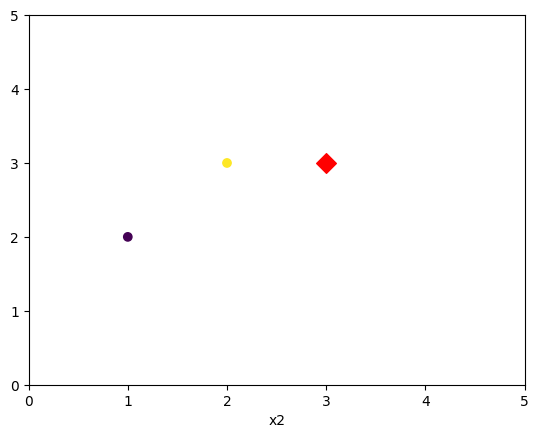

In [ ]:
# 산포도
# 학습용 데이터
plt.scatter(X_train[:,0],X_train[:,1],c=Y_train)
# 테스트용 데이터
plt.scatter(X_test[:,0],X_test[:,1],c='red',marker='D',s=100)

plt.xlabel('x1')
plt.xlabel('x2')
plt.xlim(0,5)
plt.ylim(0,5)
plt.show()

### 모형화 및 예측

In [ ]:
# SVM 분류 모형화
clf = svm.SVC(kernel='linear') # 선형분류

In [ ]:
# 모형 학습
clf.fit(X_train,Y_train)

SVC(kernel='linear')

In [ ]:
# 서포트 벡터 확인
print(clf.support_vectors_)

[[1. 2.]
 [2. 3.]]


In [ ]:
# 서포트 벡터의 index
print(clf.support_)

[1 0]


In [ ]:
# 각 개체들의 분류
print(clf.classes_)

[-1  1]


In [ ]:
# W: 가중치
print(clf.coef_)

[[1. 1.]]


In [ ]:
# b: 편향
print(clf.intercept_)

[-4.]


In [ ]:
# 예측
Y_pred = clf.predict(X_test)
print(Y_pred)

[1]


## 응용 예제

KNN에서 사용했던 유방암 진단을 SVM으로 평가해보자

### 패키지 설정

`sklearn.datasets.load_breast_cancer`: 유방암 데이터셋 로더  
`svm`: SVM 분류 모듈  
`StandardScaler`: 표준화 모듈   
`train_test_split`: 학습용/테스트용 데이터 분리 함수   
`confusion_matrix`: 혼돈행렬 계산 함수   

In [ ]:
from sklearn.datasets import load_breast_cancer
from sklearn import svm
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix

In [ ]:
# 데이터 로딩
data = load_breast_cancer(as_frame=True)

In [ ]:
# 데이터 프레임 출력
print(data.frame)

     mean radius  mean texture  mean perimeter  mean area  mean smoothness  \
0          17.99         10.38          122.80     1001.0          0.11840   
1          20.57         17.77          132.90     1326.0          0.08474   
2          19.69         21.25          130.00     1203.0          0.10960   
3          11.42         20.38           77.58      386.1          0.14250   
4          20.29         14.34          135.10     1297.0          0.10030   
..           ...           ...             ...        ...              ...   
564        21.56         22.39          142.00     1479.0          0.11100   
565        20.13         28.25          131.20     1261.0          0.09780   
566        16.60         28.08          108.30      858.1          0.08455   
567        20.60         29.33          140.10     1265.0          0.11780   
568         7.76         24.54           47.92      181.0          0.05263   

     mean compactness  mean concavity  mean concave points  mea

In [ ]:
# 입력 부분과 목표값 출력
print(data.data)
print(data.target)

     mean radius  mean texture  mean perimeter  mean area  mean smoothness  \
0          17.99         10.38          122.80     1001.0          0.11840   
1          20.57         17.77          132.90     1326.0          0.08474   
2          19.69         21.25          130.00     1203.0          0.10960   
3          11.42         20.38           77.58      386.1          0.14250   
4          20.29         14.34          135.10     1297.0          0.10030   
..           ...           ...             ...        ...              ...   
564        21.56         22.39          142.00     1479.0          0.11100   
565        20.13         28.25          131.20     1261.0          0.09780   
566        16.60         28.08          108.30      858.1          0.08455   
567        20.60         29.33          140.10     1265.0          0.11780   
568         7.76         24.54           47.92      181.0          0.05263   

     mean compactness  mean concavity  mean concave points  mea

### 데이터 분리

In [ ]:
# 학습용과 테스트용 데이터 분리
X_train, X_test, Y_train, Y_test = train_test_split(data.data, data.target, test_size=0.3, random_state=1234)

print(X_train.shape)
print(X_test.shape)
print(Y_train.shape)
print(Y_test.shape)

(398, 30)
(171, 30)
(398,)
(171,)


### 피처 스케일링

In [ ]:
# 피처 스케일링: 학습 데이터
scalerX = StandardScaler()
scalerX.fit(X_train)
X_train_std = scalerX.transform(X_train)
print(X_train_std)

[[-1.53753797 -0.55554819 -1.51985982 ... -1.73344373 -0.77142494
   0.22129607]
 [-0.79609663 -0.38603656 -0.81356785 ... -0.43011095  0.08970515
  -0.36303452]
 [ 0.21752653 -0.38603656  0.18557689 ...  0.76443594  0.80894448
  -0.67502531]
 ...
 [-0.48269225 -0.14686262 -0.46083202 ... -0.21253919  0.1565732
   0.16129784]
 [ 1.14079887 -0.12364185  1.14739725 ...  0.25197353  0.1679897
  -0.23677737]
 [-0.41210568 -1.26610378 -0.43253113 ... -0.78299078 -0.89537548
  -0.79241315]]


In [ ]:
# 피처 스케일링: 테스트 데이터
X_test_std = scalerX.transform(X_test)
print(X_test.std)

<bound method NDFrame._add_numeric_operations.<locals>.std of      mean radius  mean texture  mean perimeter  mean area  mean smoothness  \
531       11.670         20.02           75.21      416.2          0.10160   
166       10.800          9.71           68.77      357.6          0.09594   
485       12.450         16.41           82.85      476.7          0.09514   
66         9.465         21.01           60.11      269.4          0.10440   
220       13.650         13.16           87.88      568.9          0.09646   
..           ...           ...             ...        ...              ...   
305       11.600         24.49           74.23      417.2          0.07474   
560       14.050         27.15           91.38      600.4          0.09929   
285       12.580         18.40           79.83      489.0          0.08393   
355       12.560         19.07           81.92      485.8          0.08760   
329       16.260         21.88          107.50      826.8          0.11650   

 

### 모형화 및 학습

In [ ]:
# SVM 분류 모형화 : 선형 분리
clf = svm.SVC(kernel='linear')

In [ ]:
# 모형 학습
clf.fit(X_train_std,Y_train)

SVC(kernel='linear')

### 예측 및 결과 분석

정확도 94.74%

In [ ]:
# 테스트 데이터의 분류
Y_pred = clf.predict(X_test_std)
print(Y_pred)

[1 1 1 1 1 1 0 1 0 0 0 1 1 1 1 0 1 1 1 0 1 0 0 0 0 1 0 1 1 1 1 1 0 1 1 1 1
 0 1 1 0 1 0 1 1 1 1 1 0 1 1 1 1 0 0 1 1 1 1 0 1 1 1 1 1 0 0 1 1 1 1 0 1 1
 1 1 1 0 1 0 1 1 1 0 0 0 0 0 1 0 1 1 1 0 0 1 1 1 1 1 0 0 1 1 0 1 1 0 0 1 0
 1 0 0 1 1 1 0 1 0 1 1 1 1 0 1 0 0 1 1 0 1 0 1 1 1 1 1 1 0 1 0 0 1 0 1 1 1
 0 1 1 1 0 1 1 0 1 0 0 1 1 1 0 1 1 0 1 1 1 1 0]


In [ ]:
# confusion matrix
cf = confusion_matrix(Y_test, Y_pred)
print(cf)

[[ 58   8]
 [  1 104]]


In [ ]:
# 테스트 데이터에 대한 정확도
clf.score(X_test_std, Y_test)

0.9473684210526315